In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

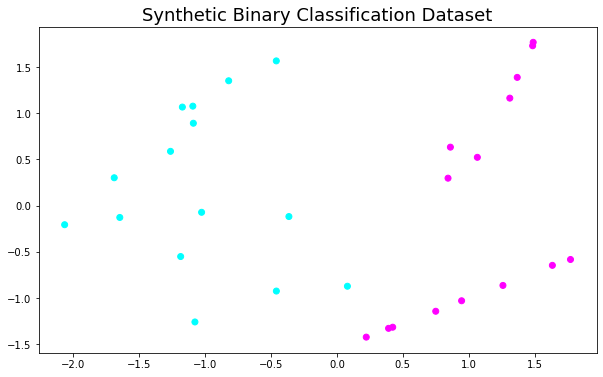

In [3]:
X, y = make_classification(n_samples=30, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,random_state=82)
plt.figure(figsize=(10,6))
plt.title("Synthetic Binary Classification Dataset", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')

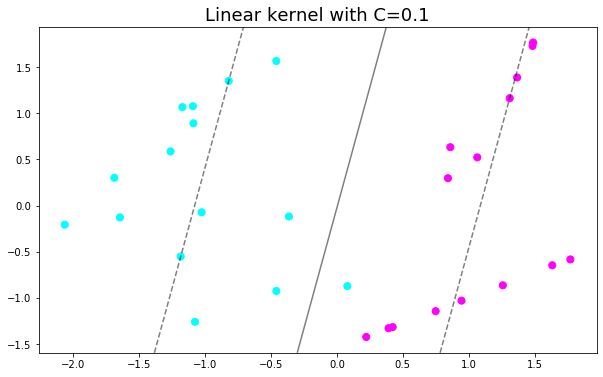

In [4]:
clf = SVC(C=0.1, kernel='linear').fit(X, y)
plt.figure(figsize=(10,6))
plt.title("Linear kernel with C=0.1", fontsize=18)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(clf)

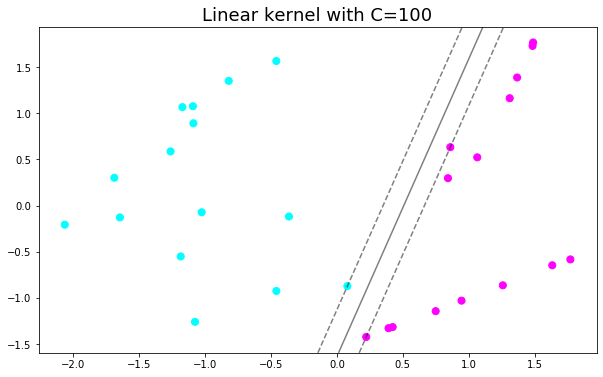

In [5]:
clf = SVC(C=100, kernel='linear').fit(X, y)
plt.figure(figsize=(10,6))
plt.title("Linear kernel with C=100", fontsize=18)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(clf)

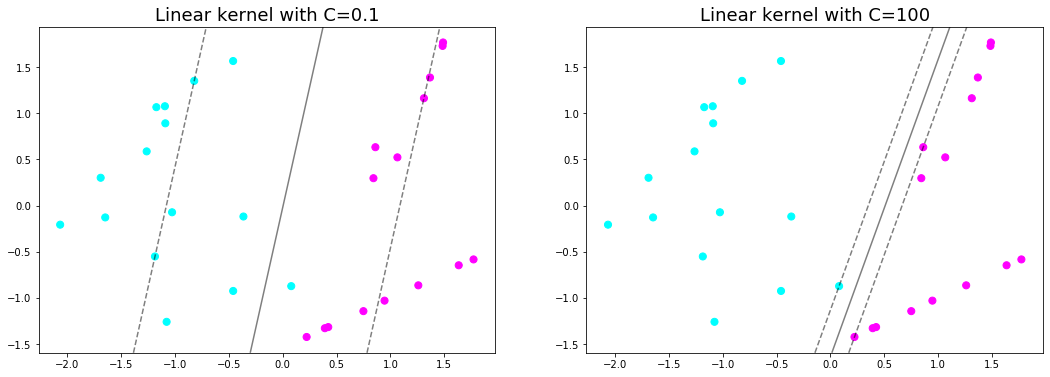

In [6]:
clf1 = SVC(C=0.1, kernel='linear').fit(X, y) # C=10, kernel='poly'
clf2 = SVC(C=100, kernel='linear').fit(X, y) # C=10, kernel='poly'

fig, [ax1, ax2 ]= plt.subplots(1, 2, figsize=(18,6))
ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
ax1.set_title("Linear kernel with C=0.1", fontsize=18)
plot_svc_decision_function(clf1, ax1)
ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
ax2.set_title("Linear kernel with C=100", fontsize=18)
plot_svc_decision_function(clf2, ax2)
